Import Libraries

In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data preprocessing

In [203]:
df = pd.read_excel('D:/Data Sets/E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [204]:
df.shape

(5630, 20)

In [205]:
df.drop('CustomerID', axis = 'columns', inplace = True)

In [206]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [208]:
df.shape

(5630, 19)

In [209]:
#total count of all missing values in the entire DataFrame.
df.isnull().sum().sum()


1856

In [210]:
#count of missing values (NaN) column-wise
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [211]:
cols_with_missing = [x for x in df if df[x].isnull().sum() > 0]
df[cols_with_missing].isnull().sum()

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [212]:
df.shape

(5630, 19)

In [213]:
!pip install lightgbm

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [214]:
from lightgbm import LGBMClassifier, LGBMRegressor

In [215]:
num_cols = [col for col in df.select_dtypes(exclude=['object']).columns if col in cols_with_missing]
# Get categorical columns with missing values
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col in cols_with_missing]

print("Categorical columns with missing values:", cat_cols_with_missing)
print("num columns with missing values:", num_cols)

Categorical columns with missing values: []
num columns with missing values: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [216]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[num_cols].fillna(df[num_cols].median())))  # Fill NaNs temporarily
outliers_z = z_scores > 3  # Threshold = 3 standard deviations
print("Outliers (Z-Score > 3):")
print(outliers_z.sum())

Outliers (Z-Score > 3):
Tenure                           4
WarehouseToHome                  2
HourSpendOnApp                   3
OrderAmountHikeFromlastYear      0
CouponUsed                     106
OrderCount                     176
DaySinceLastOrder               43
dtype: int64


 For High-Outlier Columns (CouponUsed, OrderCount, DaySinceLastOrder)
Method: Median + Capping, 
 For Moderate-Outlier Columns (Tenure, WarehouseToHome, HourSpendOnApp)
Method: Iterative Imputation (MICE)
or No-Outlier Columns (OrderAmountHikeFromlastYear)
Method: Mean Imputation

In [217]:
# Step 1: Median imputation
high_outlier_cols = ['CouponUsed', 'OrderCount', 'DaySinceLastOrder']
df[high_outlier_cols] = df[high_outlier_cols].fillna(df[high_outlier_cols].median())

# Step 2: Cap outliers at 95th percentile
for col in high_outlier_cols:
    cap = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=cap)

In [218]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mod_outlier_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp']
imputer = IterativeImputer(max_iter=10, random_state=42)
df[mod_outlier_cols] = imputer.fit_transform(df[mod_outlier_cols])

In [219]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(
    df['OrderAmountHikeFromlastYear'].mean()
)

Validation Check

In [220]:
z_scores = np.abs(stats.zscore(df[num_cols]))
print("Outliers after imputation (Z > 3):\n", (z_scores > 3).sum())

Outliers after imputation (Z > 3):
 Tenure                         4
WarehouseToHome                2
HourSpendOnApp                 3
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64


In [221]:
# Option 1: Cap these columns too (if outliers are unrealistic)
cols_to_cap = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp']
for col in cols_to_cap:
    q95 = df[col].quantile(0.95)
    df[col] = np.where(df[col] > q95, q95, df[col])

Final Validation Check

In [222]:
# Check descriptive statistics
print(df[num_cols].describe())

# Verify no missing values remain
print(df[num_cols].isnull().sum())

# Check value ranges make sense
for col in num_cols:
    print(f"{col} range: {df[col].min():.1f} to {df[col].max():.1f}")

            Tenure  WarehouseToHome  HourSpendOnApp  \
count  5630.000000      5630.000000     5630.000000   
mean     10.068151        15.474143        2.931077   
std       8.048400         7.808350        0.704252   
min       0.000000         5.000000        0.000000   
25%       3.000000         9.000000        2.000000   
50%       9.000000        14.000000        3.000000   
75%      15.000000        20.000000        3.000000   
max      27.000000        32.000000        4.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  5630.000000  5630.000000  5630.000000   
mean                     15.707922     1.626821     2.791474   
std                       3.587926     1.509192     2.327708   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.00

In [223]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

No null values. So missing values handling done! 

In [224]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Label Encoding

In [225]:
def print_unique_values(df):
    for column in df.select_dtypes(include=['object']).columns:
        print(f'{column}: {df[column].unique()}')


In [226]:
print_unique_values(df)

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [227]:
df1 = df.copy()
df1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.249232,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.080490,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.929225,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [228]:
df1.replace('Mobile Phone', 'Mobile', inplace=True)
df1.replace('Phone', 'Mobile', inplace=True)

In [229]:
print_unique_values(df1)

PreferredLoginDevice: ['Mobile' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


For only 2 categories using 1 and 0

In [230]:
df1['PreferredLoginDevice'].replace({'Mobile':0,'Computer':1}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27248\3811179462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['PreferredLoginDevice'].replace({'Mobile':0,'Computer':1}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27248\3811179462.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [231]:
df1['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27248\901126598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27248\901126598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].re

In [232]:
df1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,0,3,6.0,Debit Card,0,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.249232,0,1,8.0,UPI,1,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.080490,0,1,30.0,Debit Card,1,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,0,3,15.0,Debit Card,1,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,0,1,12.0,CC,1,2.929225,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,1,1,30.0,Credit Card,1,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.000000,0,1,13.0,Credit Card,1,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.000000,0,1,11.0,Debit Card,1,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.000000,1,3,9.0,Credit Card,1,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


for more than 2, using one hot encoding and dummy

In [233]:
df1=pd.get_dummies(data=df1, columns=['PreferredPaymentMode','PreferedOrderCat','MaritalStatus'], dtype=int)

In [234]:
df1.dtypes

Churn                                      int64
Tenure                                   float64
PreferredLoginDevice                       int64
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredPaymentMode_CC                    int32
PreferredPaymentMode_COD                   int32
PreferredPaymentMode_Cash on Delivery      int32
PreferredPaymentMode_Credit Card           int32
PreferredPaymentMode

So all encoding done!

In [268]:
df1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,0,3,6.0,0,3.000000,3,2,9,...,0,0,0,0,1,0,0,0,0,1
1,1,10.249232,0,1,8.0,1,3.000000,4,3,7,...,0,1,0,0,0,1,0,0,0,1
2,1,10.080490,0,1,30.0,1,2.000000,4,3,6,...,0,0,0,0,0,1,0,0,0,1
3,1,0.000000,0,3,15.0,1,2.000000,4,5,8,...,0,0,0,0,1,0,0,0,0,1
4,1,0.000000,0,1,12.0,1,2.929225,3,5,3,...,0,0,0,0,0,1,0,0,0,1


Train-Test Split FIRST

In [271]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn', axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to keep churn ratio same
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4504, 30), y_train shape: (4504,)
X_test shape: (1126, 30), y_test shape: (1126,)


 Scaling on Training Set Only

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


SMOTE (Balancing) – Only on Training Data

In [274]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
print(f"X_train_bal shape: {X_train_bal.shape}, y_train_bal shape: {y_train_bal.shape}")

X_train_bal shape: (7492, 30), y_train_bal shape: (7492,)


XGBoost Model

In [275]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_bal, y_train_bal)

# Predict on test
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_preds = (xgb_probs > 0.5).astype(int)

# Evaluate
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb_probs))


XGBoost ROC AUC: 0.9605656770130454


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:25:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


BiLSTM + CNN Model


In [276]:
import numpy as np

# Reshape: (samples, timesteps, features) → timesteps = 1
X_train_dl = X_train_bal.reshape(X_train_bal.shape[0], 1, X_train_bal.shape[1])
X_test_dl = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [277]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

class BiLSTM_CNN(nn.Module):
    def __init__(self, input_dim):
        super(BiLSTM_CNN, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True, bidirectional=True)
        self.conv1 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # (batch, seq_len, hidden*2)
        lstm_out = lstm_out.permute(0, 2, 1)  # reshape for Conv1d
        conv_out = self.relu(self.conv1(lstm_out))
        pooled = torch.mean(conv_out, dim=2)
        x = self.relu(self.fc1(pooled))
        x = self.sigmoid(self.fc2(x))
        return x


In [278]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BiLSTM_CNN(input_dim=X_train_dl.shape[2]).to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare data
train_dataset = TensorDataset(
    torch.tensor(X_train_dl).float(), torch.tensor(y_train_bal).float()
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).squeeze()
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1, Loss: 0.4465
Epoch 2, Loss: 0.3070
Epoch 3, Loss: 0.2358
Epoch 4, Loss: 0.1819
Epoch 5, Loss: 0.1406
Epoch 6, Loss: 0.1098
Epoch 7, Loss: 0.0948
Epoch 8, Loss: 0.0814
Epoch 9, Loss: 0.0685
Epoch 10, Loss: 0.0516


Predictions from BiLSTM-CNN

In [279]:
model.eval()
with torch.no_grad():
    test_tensor = torch.tensor(X_test_dl).float().to(device)
    nn_probs = model(test_tensor).squeeze().cpu().numpy()
    nn_preds = (nn_probs > 0.5).astype(int)

print("BiLSTM-CNN ROC AUC:", roc_auc_score(y_test, nn_probs))


BiLSTM-CNN ROC AUC: 0.9856893837156995


Combine XGBoost + BiLSTM-CNN

In [280]:
final_probs = 0.5 * xgb_probs + 0.5 * nn_probs
final_preds = (final_probs > 0.5).astype(int)

print("Ensembled ROC AUC:", roc_auc_score(y_test, final_probs))


Ensembled ROC AUC: 0.9871063877642825


In [281]:
from sklearn.metrics import fbeta_score, recall_score, precision_score, accuracy_score

# Assuming final_preds is your predicted labels (0 or 1)
# and y_test is the actual labels

f2 = fbeta_score(y_test, final_preds, beta=2)
recall = recall_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
accuracy = accuracy_score(y_test, final_preds)

print(f"F2 Score     : {f2:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Accuracy     : {accuracy:.4f}")


F2 Score     : 0.9170
Recall       : 0.9421
Precision    : 0.8287
Accuracy     : 0.9574


Plot ROC and AUC 

ROC AUC Score: 0.9871


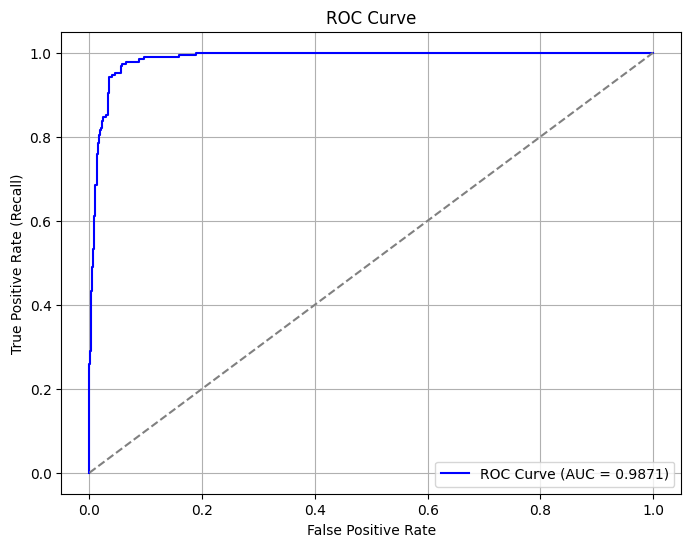

In [282]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# final_probs: predicted probabilities from your ensemble or model
# y_test: actual labels

# ROC AUC score
roc_auc = roc_auc_score(y_test, final_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


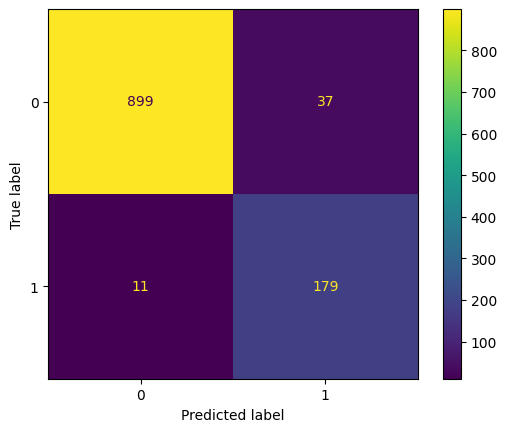

In [284]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, final_preds)

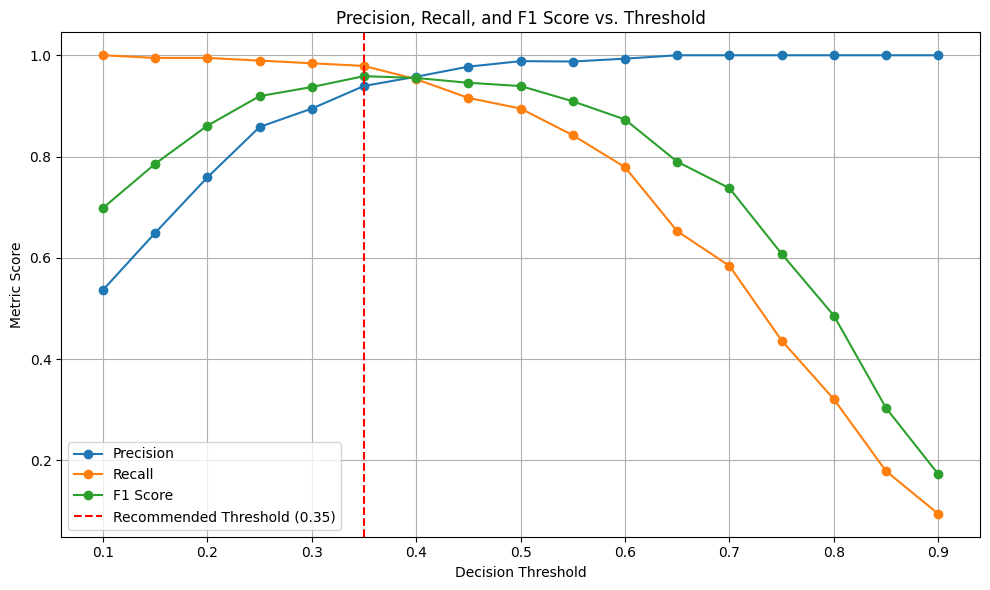

In [287]:
# Compare multiple thresholds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Simulate threshold range and generate performance metrics for each threshold
thresholds = np.arange(0.1, 0.91, 0.05)
precision_list = []
recall_list = []
f1_list = []

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Train a simple model to generate probabilities (simulate your actual deep model)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Evaluate across thresholds
for threshold in thresholds:
    y_pred_thresh = (y_pred_probs > threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary', zero_division=0)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plotting precision, recall, and F1 vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1 Score', marker='o')
plt.axvline(0.35, color='red', linestyle='--', label='Recommended Threshold (0.35)')
plt.xlabel('Decision Threshold')
plt.ylabel('Metric Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [290]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, final_preds))

print("\nClassification Report:")
print(classification_report(y_test, final_preds))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, final_preds))

Confusion Matrix:
[[899  37]
 [ 11 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       936
           1       0.83      0.94      0.88       190

    accuracy                           0.96      1126
   macro avg       0.91      0.95      0.93      1126
weighted avg       0.96      0.96      0.96      1126


ROC-AUC Score:
0.9512876743139902


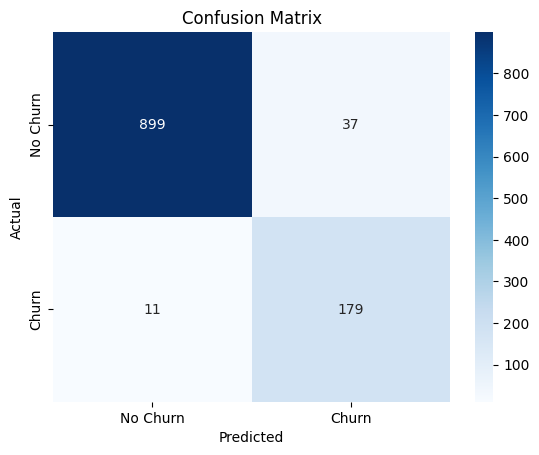

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
import numpy as np

def preprocess_churn_data(df1):
    df = df.copy()

    # Drop CustomerID (non-informative)
    if 'CustomerID' in df.columns:
        df.drop('CustomerID', axis=1, inplace=True)

    # Ensure target is integer
    df1['Churn'] = df['Churn'].astype(int)

    # Separate target early
    y = df['Churn']
    X = df.drop('Churn', axis=1)

    # Split categorical and numerical columns
    cat_cols = X.select_dtypes(include='object').columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Impute missing values
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='median')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

    # Encode categorical
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Optional: Outlier removal (IsolationForest)
    iso = IsolationForest(contamination=0.02, random_state=42)
    outliers = iso.fit_predict(X)
    X = X[outliers != -1]
    y = y[outliers != -1]

    # Scale numeric columns
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # SMOTE for class balance
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    return X_res, X_test, y_res, y_test, X.columns.tolist()


NameError: name 'X_res' is not defined

In [293]:
df1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,0,3,6.0,0,3.000000,3,2,9,...,0,0,0,0,1,0,0,0,0,1
1,1,10.249232,0,1,8.0,1,3.000000,4,3,7,...,0,1,0,0,0,1,0,0,0,1
2,1,10.080490,0,1,30.0,1,2.000000,4,3,6,...,0,0,0,0,0,1,0,0,0,1
3,1,0.000000,0,3,15.0,1,2.000000,4,5,8,...,0,0,0,0,1,0,0,0,0,1
4,1,0.000000,0,1,12.0,1,2.929225,3,5,3,...,0,0,0,0,0,1,0,0,0,1


In [294]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.249232,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.080490,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.929225,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


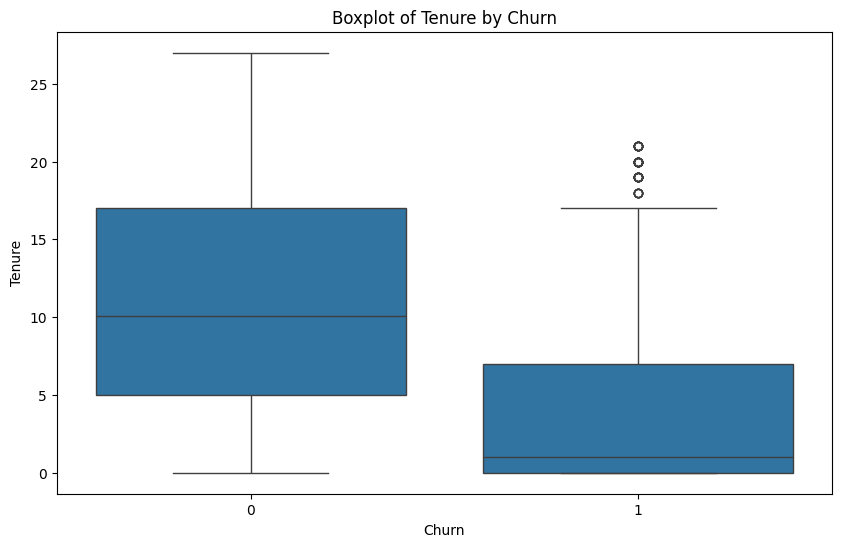

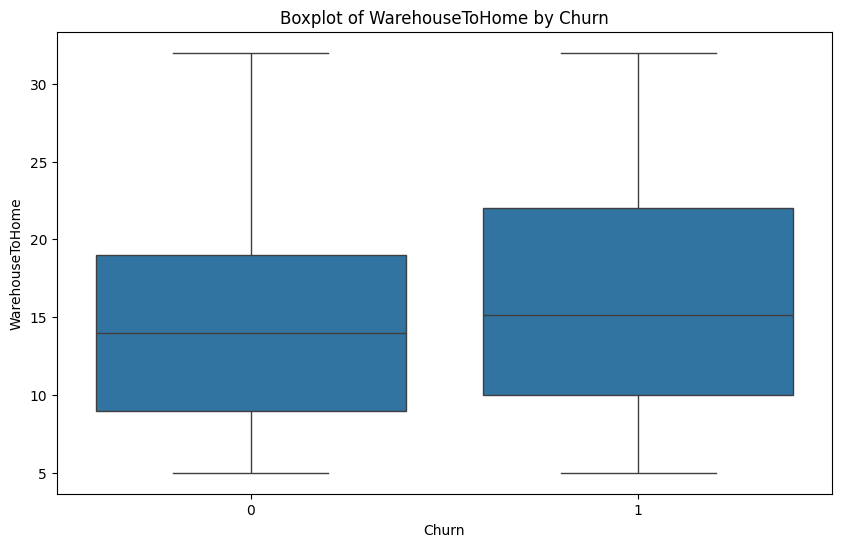

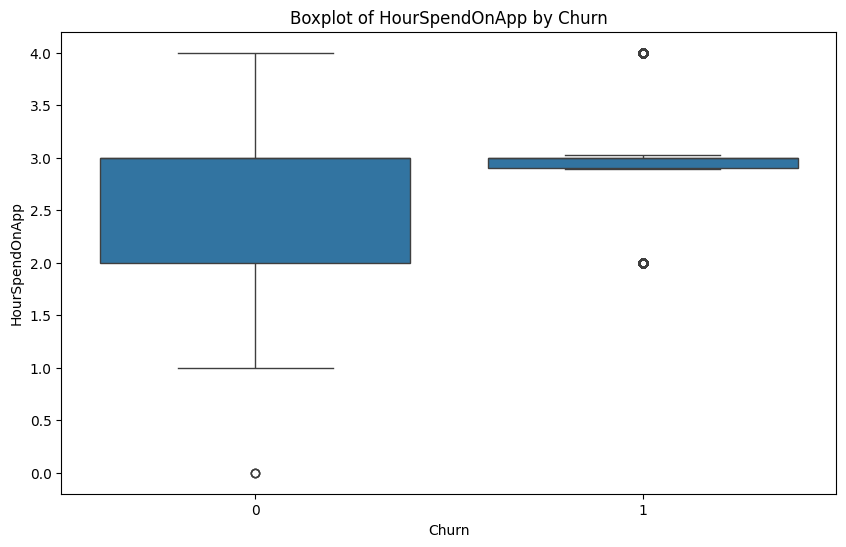

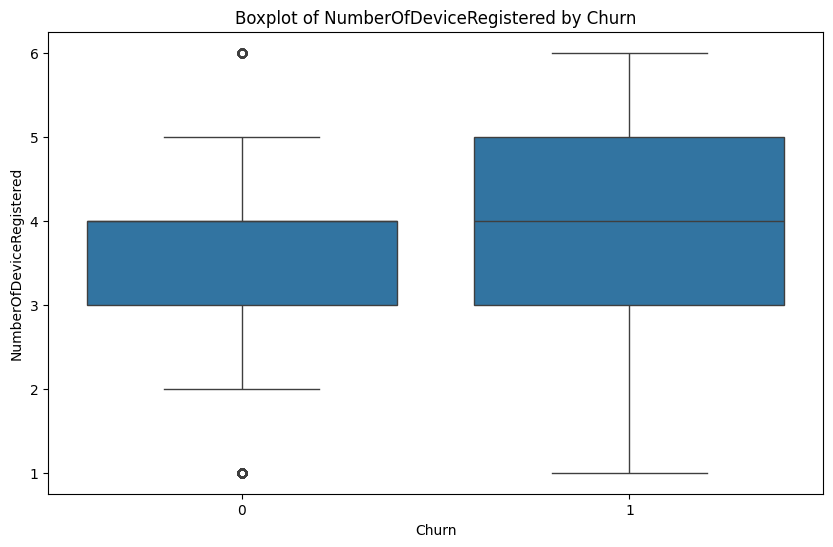

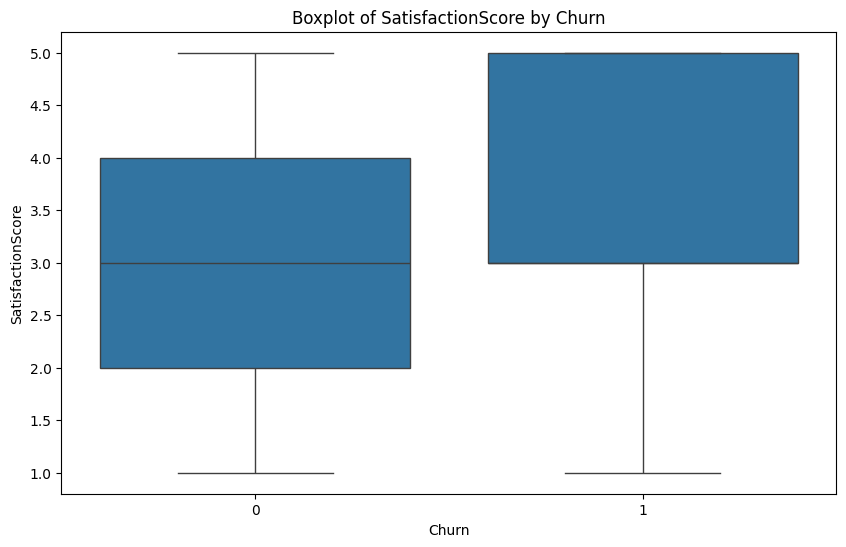

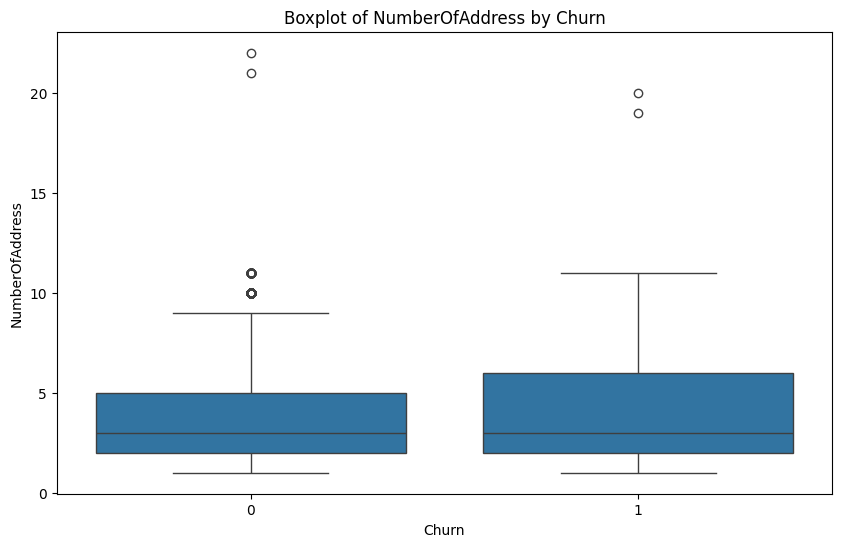

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress']

#draw plot against the churn column
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df1, x='Churn', y=col)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()  
    


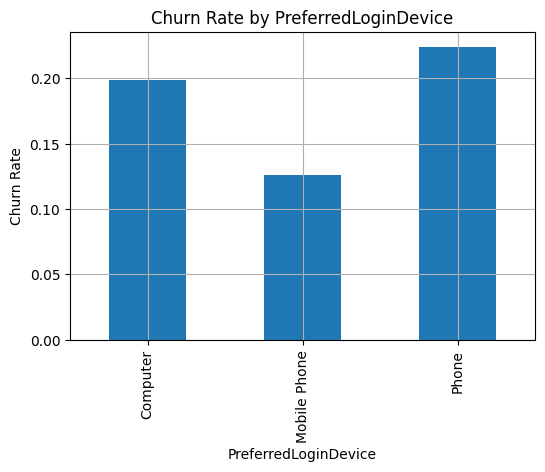

PreferredLoginDevice
Computer        0.198286
Mobile Phone    0.125859
Phone           0.224208
Name: Churn, dtype: float64
----------------------------------------


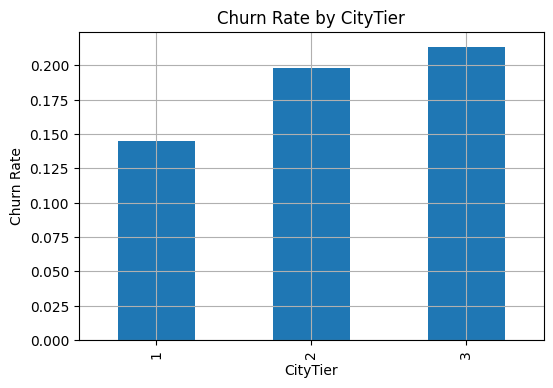

CityTier
1    0.145117
2    0.198347
3    0.213705
Name: Churn, dtype: float64
----------------------------------------


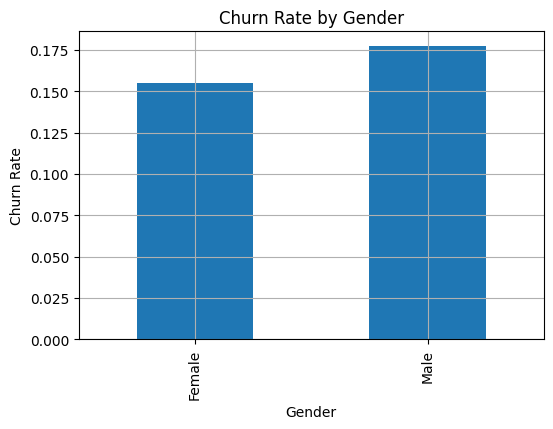

Gender
Female    0.154942
Male      0.177305
Name: Churn, dtype: float64
----------------------------------------


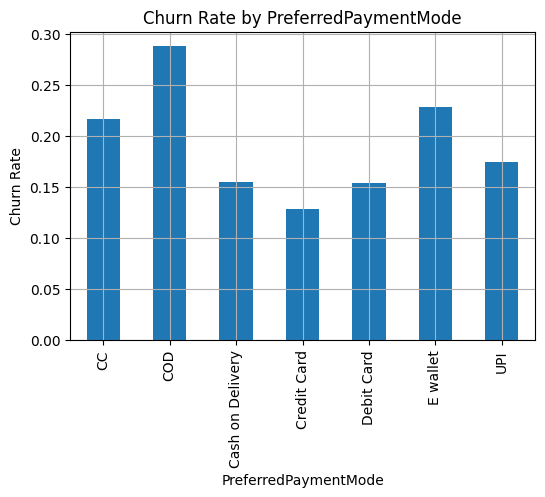

PreferredPaymentMode
CC                  0.216117
COD                 0.287671
Cash on Delivery    0.154362
Credit Card         0.128581
Debit Card          0.153846
E wallet            0.228013
UPI                 0.173913
Name: Churn, dtype: float64
----------------------------------------


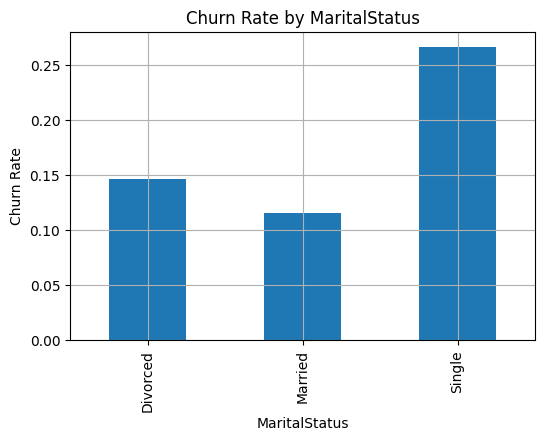

MaritalStatus
Divorced    0.146226
Married     0.115204
Single      0.267261
Name: Churn, dtype: float64
----------------------------------------


<Figure size 640x480 with 0 Axes>

In [304]:
cat_cols = ['PreferredLoginDevice', 'CityTier', 'Gender',
            'PreferredPaymentMode', 
            'MaritalStatus']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    churn_rate = df.groupby(col)['Churn'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.grid(True)
    plt.show()

    print(churn_rate)
    print("-" * 40)
plt.tight_layout()

